# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

In [3]:
# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
temp_html = browser.html
temp_soup = soup(temp_html, 'html.parser')

In [5]:
# Extract all rows of data 
table_all = temp_soup.find('table', class_='table')
temp_header_tr = table_all.find('tr')
temp_data = table_all.find_all('tr', class_='data-row')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. 

In [6]:
# Big Gratitude and credit given to tutor Kourt Bailey for
# explaining and creating this function with me to
# loop through the scraped data to create a list of rows

def parse_tr(tag):
    th_list = tag.find_all('th')
    td_list = tag.find_all('td')
    column_tags = th_list + td_list
    row_data = [c.text for c in column_tags]
    return row_data

In [8]:
# Create a list of the data in each row
parsed_temp_list = [parse_tr(r) for r in temp_data]
parsed_temp_list

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [9]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
import pandas as pd
temp_headers = parse_tr(temp_header_tr)
temp_df = pd.DataFrame(parsed_temp_list, columns=temp_headers)
temp_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
print(temp_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [11]:
# Change data types for data analysis
#temp_df.terrestrial_date = pd.to_datetime(temp_df.terrestrial_date, dayfirst=True)
temp_df['terrestrial_date'] = pd.to_datetime(temp_df['terrestrial_date'])
temp_df['sol'] = temp_df['sol'].astype(int)
temp_df['ls'] = temp_df['ls'].astype(int)
temp_df['month'] = temp_df['month'].astype(int)
temp_df['min_temp'] = temp_df['min_temp'].astype(float)
temp_df['pressure'] = temp_df['pressure'].astype(float)

In [12]:
# Confirm type changes were successful by examining data types again
print(temp_df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months are there on Mars?
total_months = temp_df.groupby('month')['month'].count()
print(total_months)

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64


In [14]:
# 2. How many Martian days' worth of data are there?
total_days = len(temp_df)
print("Total number of martian days:", total_days)

Total number of martian days: 1867


In [15]:
# 3. What is the average low temperature by month?
avg_month_temp = temp_df.groupby('month')['min_temp'].mean()

print(avg_month_temp)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


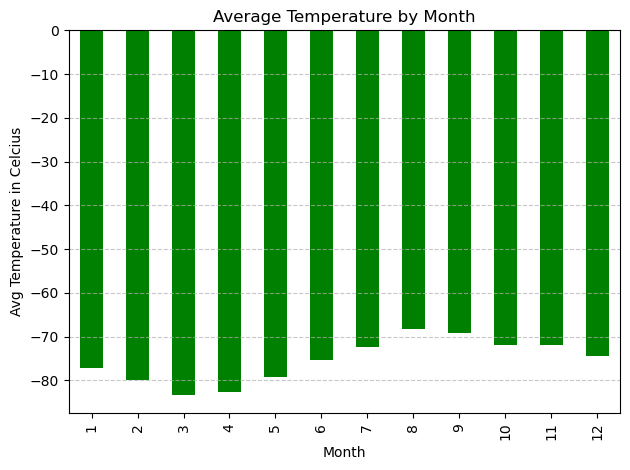

In [16]:
# Plot the average temperature by month
avg_month_temp.plot(kind='bar', color='green')
plt.title('Average Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Avg Temperature in Celcius')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [17]:
# Identify the coldest and hottest months in Curiosity's location
hottest_month = avg_month_temp.idxmax()
coldest_month = avg_month_temp.idxmin()
print("As you can see from the plot below:")
print("The hottest month on mars is month #", hottest_month)
print("The coldest month on mars is month #", coldest_month)

As you can see from the plot below:
The hottest month on mars is month # 8
The coldest month on mars is month # 3


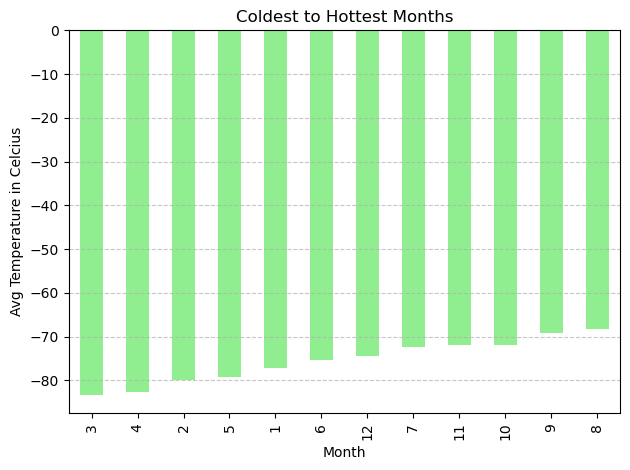

In [18]:
#Plot the months by increasing temperatures
sorted_temp = avg_month_temp.sort_values()
sorted_temp.plot(kind='bar', color = "lightgreen" )
plt.title('Coldest to Hottest Months')
plt.xlabel('Month')
plt.ylabel('Avg Temperature in Celcius')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [19]:
# 4. Average pressure by Martian month
avg_monthly_pressure = temp_df.groupby('month')['pressure'].mean()
avg_monthly_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

In [20]:
# Identify the coldest and hottest months in Curiosity's location
high_month = avg_monthly_pressure.idxmax()
low_month = avg_monthly_pressure.idxmin()
print("As you can see from the plot below:")
print("Mars experiences the highest atmospheric pressure during month #", high_month)
print("Mars experiences the lowest atmospheric pressure during month #", low_month)

As you can see from the plot below:
Mars experiences the highest atmospheric pressure during month # 9
Mars experiences the lowest atmospheric pressure during month # 6


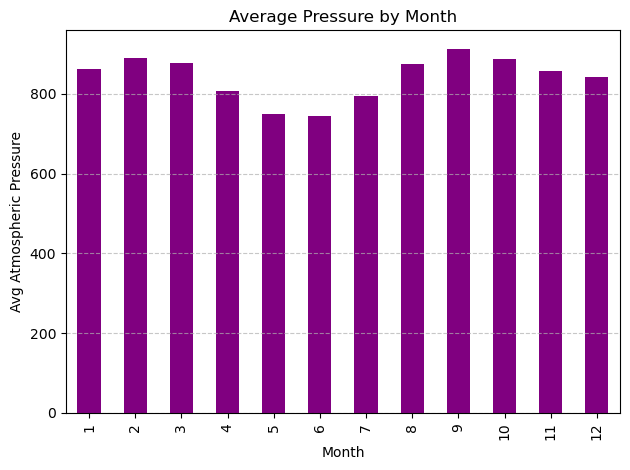

In [21]:
# Plot the average pressure by month
avg_monthly_pressure.plot(kind='bar', color='purple')
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Avg Atmospheric Pressure')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

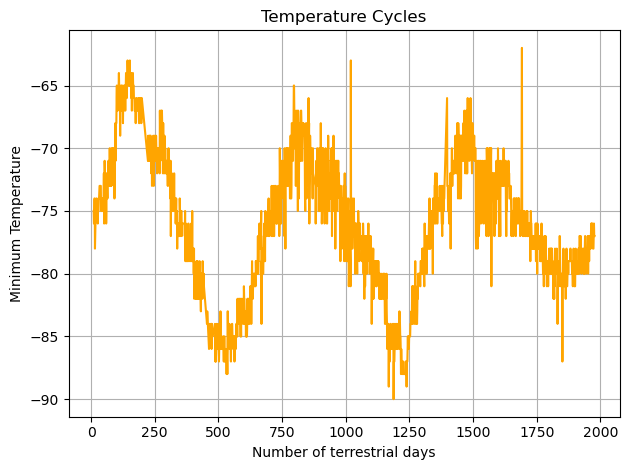

In [28]:
# 5. How many terrestrial (earth) days are there in a Martian year?
plt.plot(temp_df['sol'], temp_df['min_temp'], linestyle='-', color='orange')
plt.title('Temperature Cycles')
plt.xlabel('Number of terrestrial days')
plt.ylabel('Minimum Temperature')
plt.grid(True)
plt.tight_layout()
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [29]:
# Write the data to a CSV
temp_df.to_csv('output_file.csv', index=False)

In [30]:
browser.quit()